In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

encoding="unicode_escape"

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\car_manufacturing 2010-2020.csv")

In [3]:
df

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,BMW,X3,2020,1.4,Diesel,50060.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             10000 non-null  object 
 1   Model            10000 non-null  object 
 2   Year             10000 non-null  int64  
 3   Engine Size (L)  10000 non-null  float64
 4   Fuel Type        10000 non-null  object 
 5   Price (USD)      10000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum()

Make               0
Model              0
Year               0
Engine Size (L)    0
Fuel Type          0
Price (USD)        0
dtype: int64

In [6]:
df["Engine Size (L)"]=df["Engine Size (L)"].astype("int")

In [7]:
df["Price (USD)"]=df["Price (USD)"].astype("int")


# how many cars manufactured in company name wise Model

In [8]:
grouped=df.groupby("Make")["Model"].count().reset_index()

In [9]:
grouped

,Make,Model
0,Audi,1019
1,BMW,986
2,Chevrolet,1025
3,Ford,975
4,Honda,989
5,Hyundai,1011
6,Mercedes-Benz,973
7,Nissan,1032
8,Toyota,961
9,Volkswagen,1029


<Axes: xlabel='Make', ylabel='Model'>

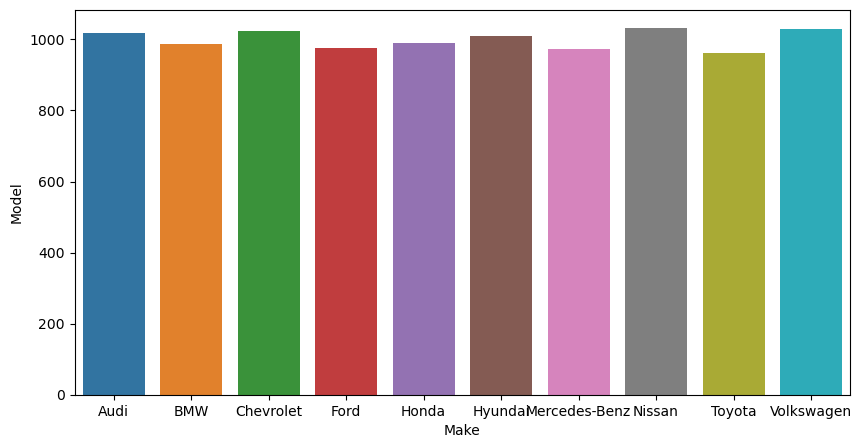

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="Make",y="Model",data=grouped)

# how many manufactured Year wise car company name and mode

In [11]:
df['Year'] = pd.cut(df["Year"], bins=[2010, 2013, 2015, 2017, 2019, 2020], 
labels=['2010-2012', '2013-2014', '2015-2016','2017-2018', '2019-2020'], right=True)

In [12]:
grouped = df.groupby(["Year", "Make"])["Model"].count().reset_index()


In [13]:
grouped

,Year,Make,Model
0,2010-2012,Audi,289
1,2010-2012,BMW,254
2,2010-2012,Chevrolet,287
3,2010-2012,Ford,263
4,2010-2012,Honda,232
5,2010-2012,Hyundai,261
6,2010-2012,Mercedes-Benz,253
7,2010-2012,Nissan,293
8,2010-2012,Toyota,276
9,2010-2012,Volkswagen,291


<Axes: xlabel='Make', ylabel='Model'>

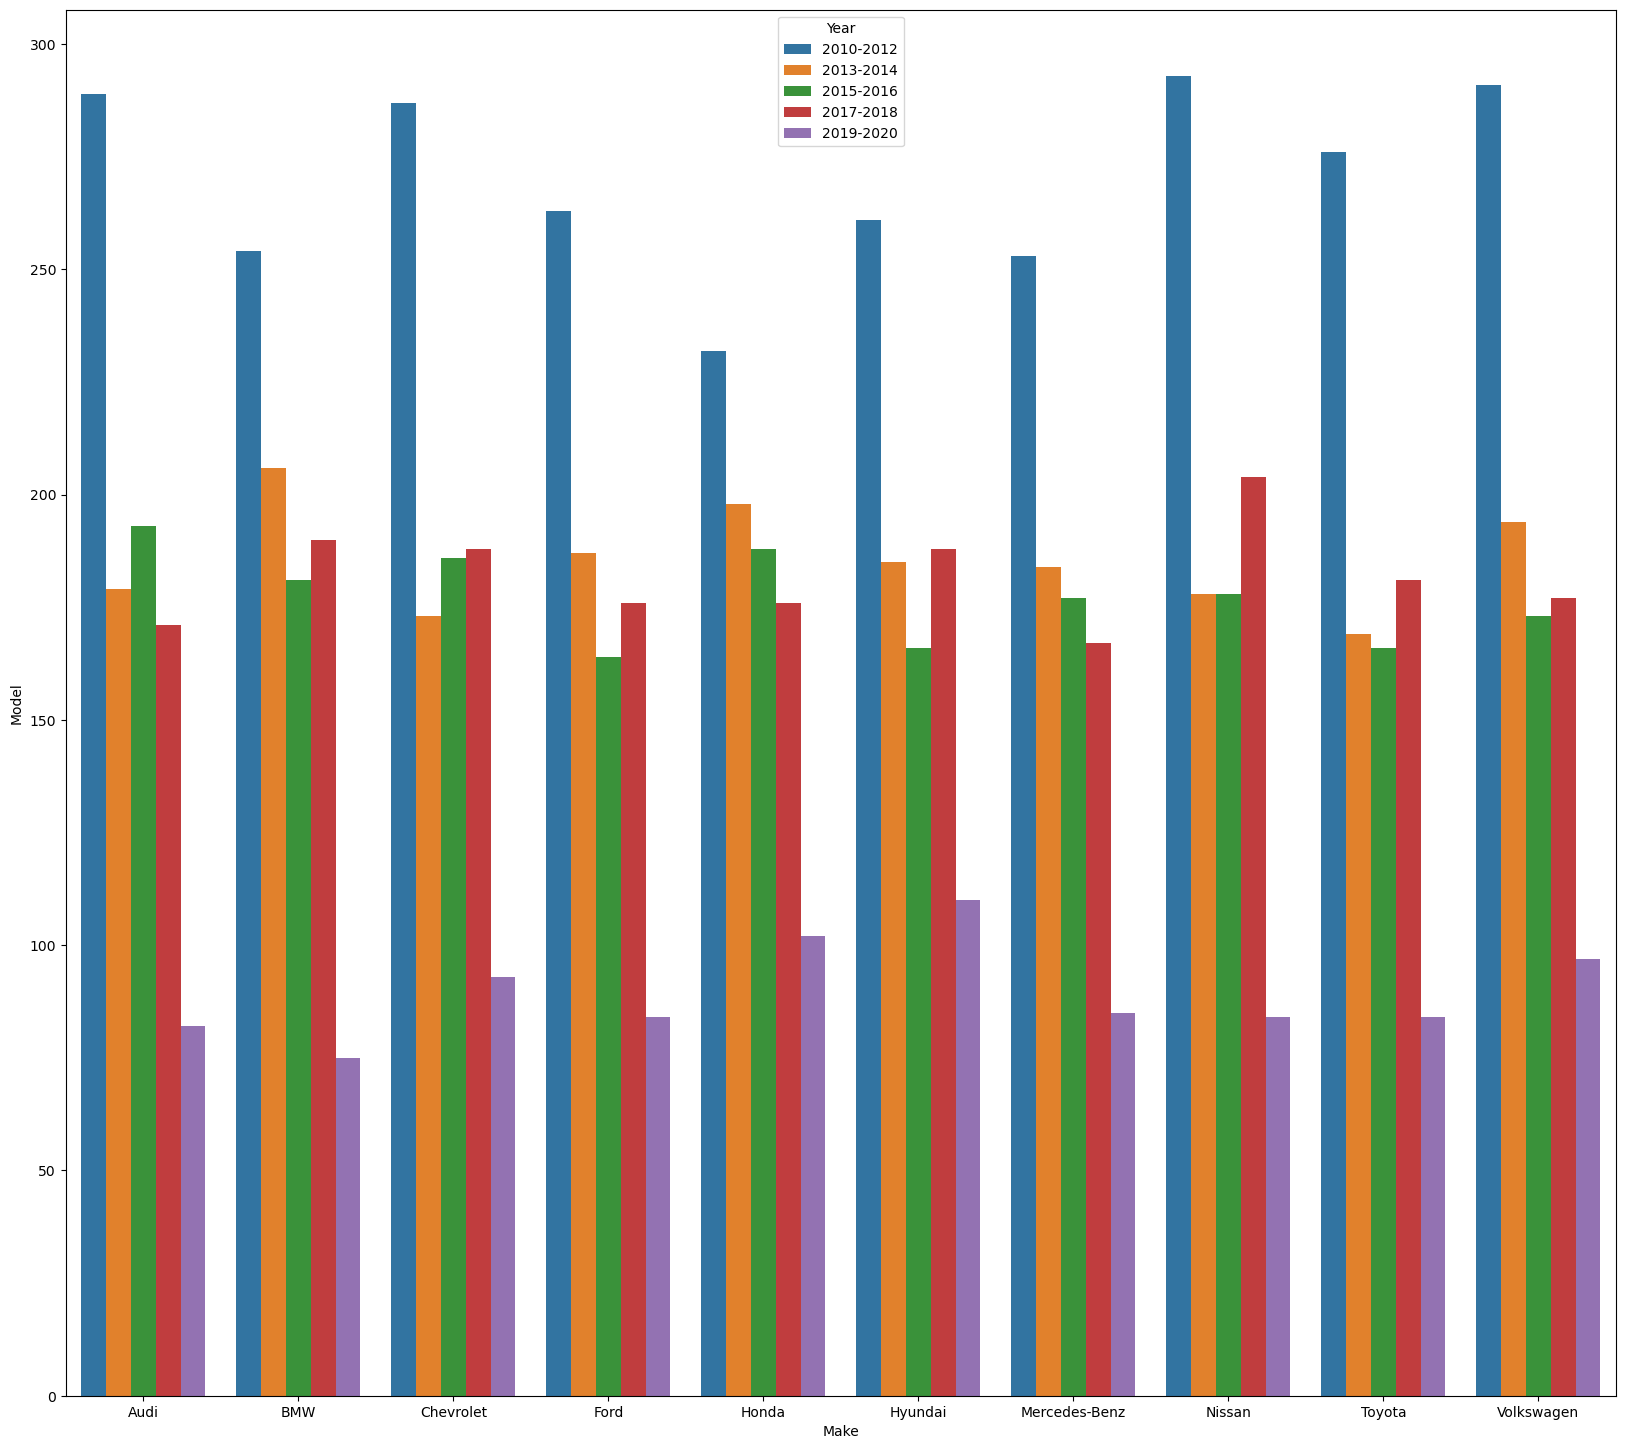

In [14]:
plt.figure(figsize=(20,18))
sns.barplot(x="Make",y="Model", data=grouped, hue="Year")

# Year and Make wise total car price

In [338]:

grouped=df.groupby(["Year","Make"],as_index=False)["Price (USD)"].sum()

In [339]:
grouped

,Year,Make,Price (USD)
0,2011-2012,Audi,8225653
1,2011-2012,BMW,7467892
2,2011-2012,Chevrolet,9413117
3,2011-2012,Ford,8062986
4,2011-2012,Honda,7575030
5,2011-2012,Hyundai,8106792
6,2011-2012,Mercedes-Benz,8364505
7,2011-2012,Nissan,9050522
8,2011-2012,Toyota,8536622
9,2011-2012,Volkswagen,9052406


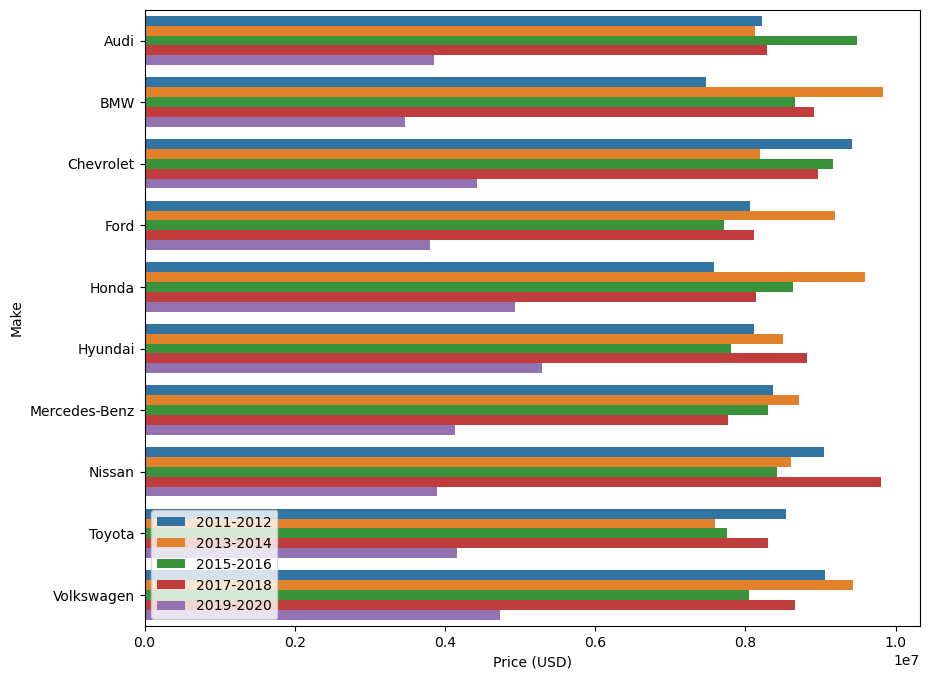

In [342]:
plt.figure(figsize=(10,8))
sns.barplot(x="Price (USD)",y="Make",data=grouped,hue="Year")
plt.legend(loc=3)

# make and mode wise Engine Size (L)



In [317]:
grouped=df.groupby(["Make","Model"],as_index=False)["Engine Size (L)"].count()


In [318]:
grouped

,Make,Model,Engine Size (L)
0,Audi,A3,196
1,Audi,A4,198
2,Audi,A6,204
3,Audi,Q5,206
4,Audi,Q7,215
5,BMW,3 Series,205
6,BMW,5 Series,220
7,BMW,7 Series,179
8,BMW,X3,201
9,BMW,X5,181


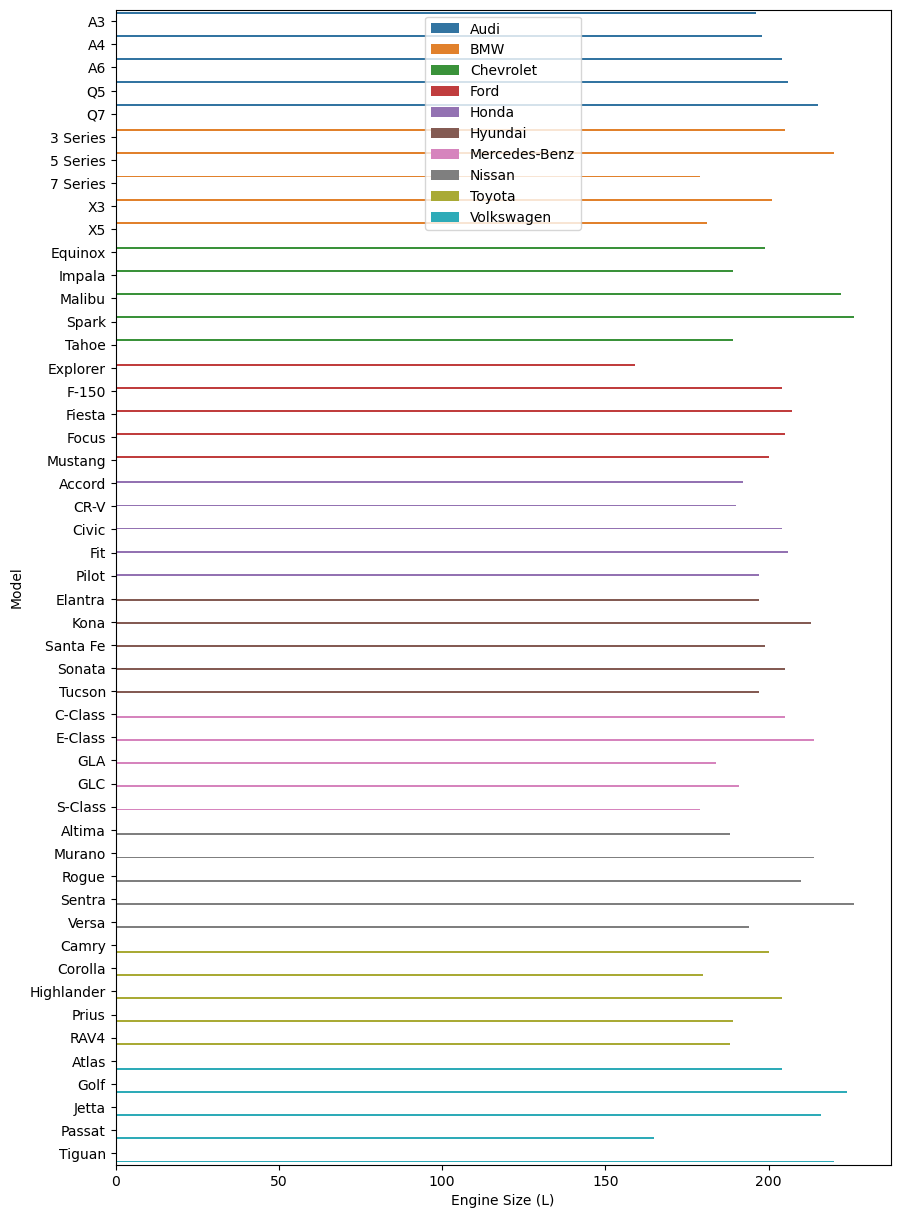

In [319]:
plt.figure(figsize=(10,15))
sns. barplot(x="Engine Size (L)",y="Model",data=grouped,hue="Make")
plt.legend(loc=9)

# company name wise sum of Fuel type

In [320]:
grouped=df.groupby(["Make", "Fuel Type"])["Fuel Type"].count()


In [321]:
grouped = grouped.reset_index(name="Count fuel Type")


In [322]:
grouped

,Make,Fuel Type,Count fuel Type
0,Audi,Diesel,260
1,Audi,Electric,254
2,Audi,Hybrid,250
3,Audi,Petrol,255
4,BMW,Diesel,255
5,BMW,Electric,226
6,BMW,Hybrid,244
7,BMW,Petrol,261
8,Chevrolet,Diesel,262
9,Chevrolet,Electric,241


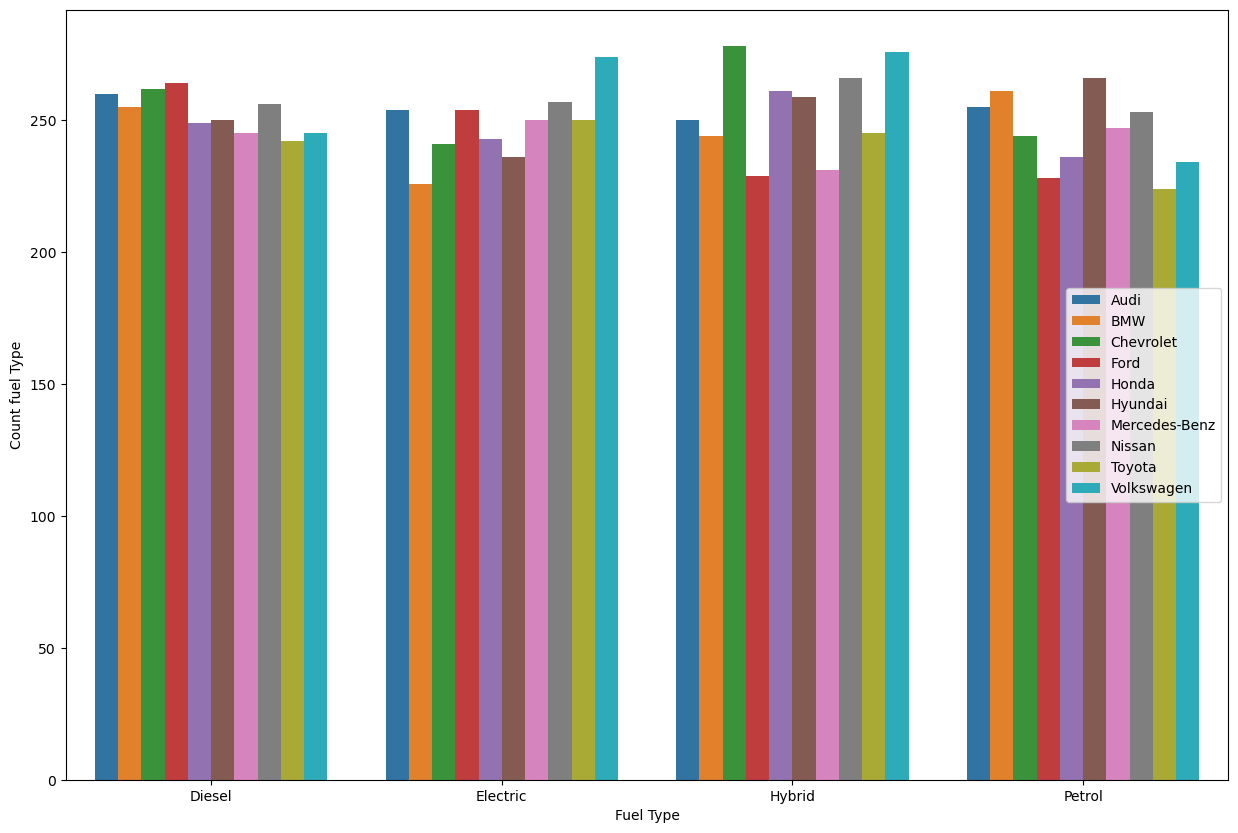

In [323]:
plt.figure(figsize=(15,10))
sns.barplot(x="Fuel Type", y="Count fuel Type",data=grouped, hue="Make")
plt.legend(loc=7)

# Fuel Type and Engine Size wise Price 

In [324]:
grouped=df.groupby(["Fuel Type" ,"Engine Size (L)"],as_index=False)["Price (USD)"].sum()

In [325]:
grouped

,Fuel Type,Engine Size (L),Price (USD)
0,Diesel,1,29233868
1,Diesel,2,30492834
2,Diesel,3,29967153
3,Diesel,4,28484093
4,Diesel,5,1994863
5,Electric,1,27262396
6,Electric,2,29852269
7,Electric,3,29458983
8,Electric,4,30464236
9,Electric,5,1612584


<Axes: xlabel='Engine Size (L)', ylabel='Price (USD)'>

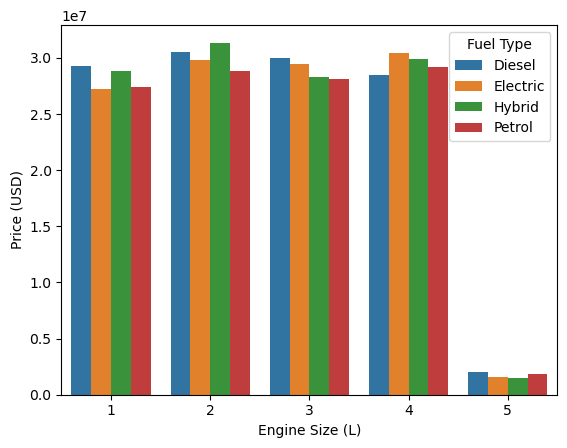

In [326]:
sns.barplot(x="Engine Size (L)",y="Price (USD)",data=grouped,hue="Fuel Type")